## Assignment Title: Credit Scoring Model Development

#### Objective:
To develop a predictive model that estimates the probability of a borrower experiencing financial distress within the next two years, using the "Give Me Some Credit" dataset from Kaggle.

#### Background:
Credit scoring is a critical component in the financial services industry, used to evaluate the risk of lending to a borrower. Machine Learning Analysts play a vital role in building predictive models that can assess this risk more accurately.

#### Dataset:
The dataset can be found at the following Kaggle competition link: [Give Me Some Credit](https://www.kaggle.com/c/GiveMeSomeCredit). You are required to create a Kaggle account if you do not have one to download the dataset.

#### Tasks:

As a  machine learning analyst, your task is to:

1. **Understand the Problem Statement**: The first step is to understand what the competition is about. In this case, it is to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

2. **Data Exploration**: Before diving into model building, the analyst would first explore the dataset to understand its features, the distribution of values, and look for any patterns or anomalies that might affect the analysis.

3. **Data Cleaning**: Based on the exploration findings, the analyst would clean the data, which includes handling missing values, correcting data types, and removing duplicates or irrelevant information.

4. **Feature Engineering**: The analyst might create new features from the existing data to improve the model's predictive power. For example, they might create new ratios or interaction features based on the current dataset's financial variables.

5. **Pre-processing**: This involves scaling or normalizing data, encoding categorical variables, and splitting the dataset into training and test sets.

6. **Model Selection**: The analyst would select appropriate machine learning algorithms for the credit scoring task. They might consider logistic regression, decision trees, random forests, gradient boosting machines, or neural networks.

7. **Model Training**: The selected models would be trained on the training dataset. The analyst would use cross-validation to estimate the effectiveness of the model and prevent overfitting.

8. **Hyperparameter Tuning**: The analyst would tune the models' hyperparameters to find the best combination that increases the predictive performance on the validation set.

9. **Model Evaluation**: Once the models are trained and tuned, the analyst would evaluate them using appropriate performance metrics, such as the area under the ROC curve (AUC), which is often used for binary classification problems like this.

10. **Model Interpretation**: The analyst would interpret the model results to understand which features are most predictive of financial distress and ensure that the model aligns with business intuition.

11. **Deployment**: If the model performs well, the analyst would deploy it into a production environment where it can be used to score credit applications.

12. **Documentation and Reporting**: Finally, the analyst would document the methodology, model development process, and performance results. They would also provide recommendations based on the model's findings.

13. **Feedback Loop**: They might establish a feedback loop where the model's predictions are compared against actual outcomes when they become available, to continuously improve the model.


# Interview Readiness

Review the [codes of contributors](https://www.kaggle.com/c/GiveMeSomeCredit/code) to this resource and answer the questions below:






**Choose some notebooks to review and list their links here:**

https://www.kaggle.com/code/abhishekgiri/give-me-some-credit-logistic-regression



**Data Understanding and Preparation:**

**Can you describe the steps taken to understand and prepare the "Give Me Some Credit" dataset for analysis?**

**How did they handle missing or inconsistent data in the dataset?**
Abhishek begins by loading the dataset and examining its structure to learn about the characteristics and their distributions. Among the columns he finds missing values like "MonthlyIncome" and "NumberOfDependents". He fixes these discrepancies by substituting the median income for the missing "MonthlyIncome" numbers and zero for the missing "NumberOfDependents".  This approach helps maintain the dataset's integrity without introducing bias.




2. **Model Selection:**

  **Which machine learning models were considered for predicting financial distress, and why?**
  
  In order to forecast financial difficulties, Abhishek opts for Logistic Regression. This choice is due to its simplicity and effectiveness in binary classification problems, making it good alternative for differentiating between people who are likely to have financial difficulties and those who are not.



3. **Model Evaluation:**

   **What evaluation metrics were used to assess the performance of the models, and why were these particular metrics chosen?**
   The Area Under the Receiver Operating Characteristic Curve (AUC-ROC) is used to evaluate the model's performance. The AUC-ROC metric evaluates how well the model differentiates between the two classes at different threshold values, the AUC-ROC metric offers a thorough assessment of its predictive power.

4. **Model Interpretation:**

  **How do you interpret the model coefficients or feature importances in the context of this credit scoring task?**

   Every feature in logistic regression is given a coefficient that represents how it affects the prediction. A positive coefficient suggests that the likelihood of financial trouble rises as the feature's value increases.  Conversely, a negative coefficient implies a decrease in the likelihood of distress with higher feature values. This interpretability allows for a clear understanding of how each factor influences the outcome.




**Ethical Considerations:**
**What ethical considerations should be taken into account when developing credit scoring models?
How can bias be identified and mitigated in machine learning models in finance?**


When developing credit scoring models, it's crucial to ensure fairness and avoid discrimination.This involves being cautious not to include features that can result in biased judgments against particular groups.By taking these actions, Abhishek's notebook offers a clear and concise approach to building a predictive model for financial distress, highlighting the significance of data preparation, model selection, and comprehensive assessment.

6.  **Analyze the dataset and carry out EDA & ML.**
- Evaluate your results
- Upload your submission.csv file to Kaggle's Leaderboard
- What is your rank on the leaderboard?


**IMPORTING LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
train_data = pd.read_csv("cs-training.csv")

In [6]:
test_data = pd.read_csv("cs-test.csv")

In [7]:
train_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [8]:
test_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [12]:
train_data.isnull().sum()


,0
Unnamed: 0,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,29731
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0


In [13]:
test_data.isnull().sum()

,0
Unnamed: 0,0
SeriousDlqin2yrs,101503
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,20103
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0


In [14]:
train_data.drop('Unnamed: 0', axis=1, inplace=True)
test_data.drop('Unnamed: 0', axis=1, inplace=True)

In [15]:
train_data.fillna(train_data.median(), inplace=True)
test_data.fillna(test_data.median(), inplace=True)

In [17]:
# check missing values
train_data.isnull().sum()


,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,0
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0
NumberOfTime60-89DaysPastDueNotWorse,0


In [18]:
test_data.isnull().sum()

,0
SeriousDlqin2yrs,101503
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,0
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0
NumberOfTime60-89DaysPastDueNotWorse,0


In [21]:
train_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)

In [22]:
train_data.isnull().sum()

,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,0
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0
NumberOfTime60-89DaysPastDueNotWorse,0


**EXPLORATORY DATA ANALYSIS(EDA)**:


In [23]:
train_data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.418455e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.289040e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


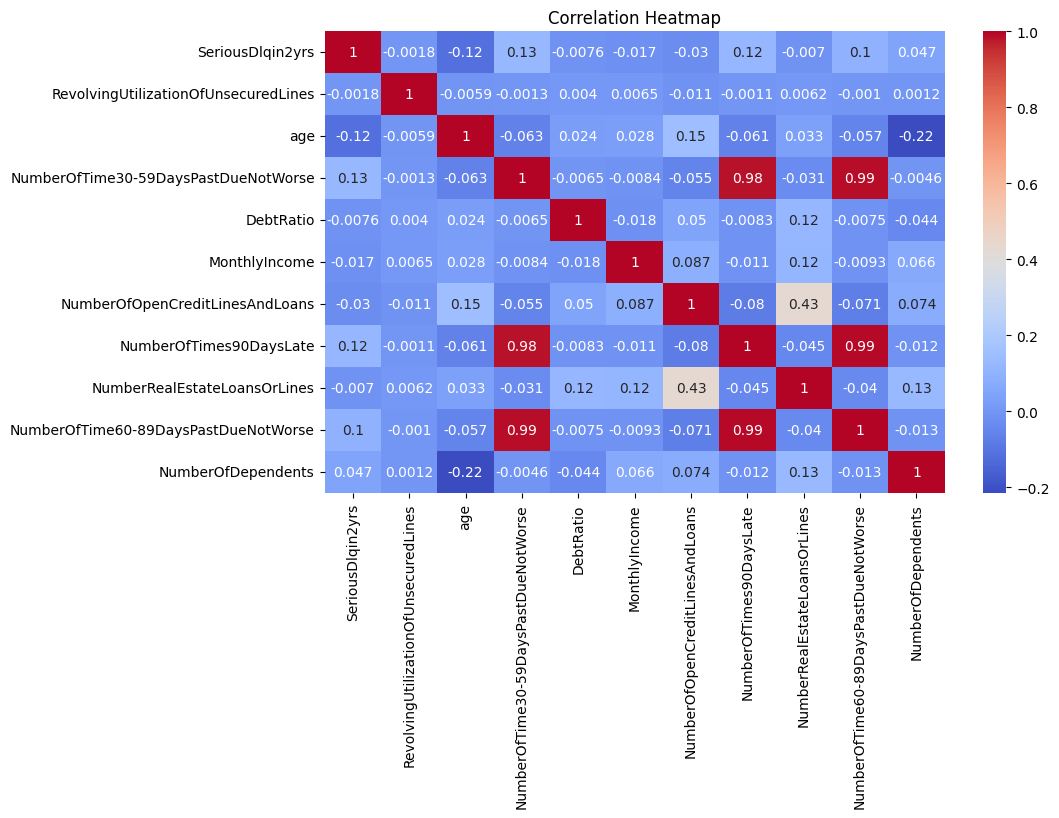

In [31]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**TRAIN MACHINE LEARNING MODELS**

In [33]:
from sklearn.model_selection import train_test_split
x = train_data.drop('SeriousDlqin2yrs', axis=1)
y = train_data['SeriousDlqin2yrs']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9346333333333333
Confusion Matrix:
 [[28019    25]
 [ 1936    20]]
ROC-AUC Score: 0.5046667462961358
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     28044
           1       0.44      0.01      0.02      1956

    accuracy                           0.93     30000
   macro avg       0.69      0.50      0.49     30000
weighted avg       0.90      0.93      0.90     30000



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
from sklearn.ensemble import RandomForestClassifier
r_model = RandomForestClassifier()

r_model.fit(x_train, y_train)
y_r_pred = r_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_r_pred))

Accuracy: 0.9364


In [42]:
# Remove the target column from test_data before prediction
test_pred = r_model.predict(test_data.drop('SeriousDlqin2yrs', axis=1))
submission = pd.DataFrame({'Id': test_data.index, 'Probability': test_pred})
submission.to_csv('submission.csv', index=False)

I wasn't able to get the rank on kaggle due to late submission on Competition itself.